# Inferential statistics
## Part I - Data Cleaning

Your family is very passionate about basketball. You always have discussions over players, games, statistics and whatnot. As you can imagine those discussions never reach a conclusion since everyone is simply sharing their opinion with no statistics to back them up!

![](../images/basket.jpg)

Since you are attending a data analysis bootcamp you'd like to take advantage of your newfound knowledge to finally put an end to your family's discussions. 

Luckily we have found a dataset containing data related to the players of the WNBA for the 2016-2017 season that we can use. 

Let's start with cleaning the data and then we'll continue with a general exploratory analysis and some inferential statistics.

### Dataset

The dataset we will be using contains the statistics from the WNBA players for the 2016-2017 season. You will be able to find more information on the dataset in the [codebook](../data/codebook.md) uploaded to the repository.

### Libraries

First we'll import the necessary libraries first and increase the maximum number of displayed columns so you will be able to see all the dataset in the same window.

In [1]:
import pandas as pd
pd.set_option('max_columns', 100)

### Load the dataset

Load the dataset into a df called `wnba` and take an initial look at it using the `head()` method.

In [6]:
wnba=pd.read_csv(r'\Users\Sacha.dolle\Desktop\Cours IH\806_Repo\Labs\module_2\M2-mini-project2\data\wnba.csv')

### Check NaN values
As you know, one of our first steps is to check if there are any NaN values in the dataset to find any issues. Look for the columns that cointain NaN values and count how many rows there are with that value.

In [8]:
wnba.isna().sum()

Name            0
Team            0
Pos             0
Height          0
Weight          1
BMI             1
Birth_Place     0
Birthdate       0
Age             0
College         0
Experience      0
Games Played    0
MIN             0
FGM             0
FGA             0
FG%             0
3PM             0
3PA             0
3P%             0
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TO              0
PTS             0
DD2             0
TD3             0
dtype: int64

We can see that there are only two NaNs in the whole dataset, one in the Weight column and one in the BMI one. Let's look at the actual rows that contain the NaN values.

In [34]:
import numpy as np
wnba[wnba.isnull().any(axis=1)]

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
91,Makayla Epps,CHI,G,178,NaN,NaN,US,"June 6, 1995",22,Kentucky,R,14,52,2,14,14.3,0,5,0.0,2,5,40.0,2,0,2,4,1,0,4,6,0,0


It looks like there is only a single row that has NaN values in it, which is good! Just in case, let's check how much removing a single row may influence our dataset by calculating the percentage of values we will be removing.

In [39]:
round(1/wnba.shape[0]*100, 2)

0.7

It is very important to be as careful as possible when dealing with NaN values and only drop data when it is strictly necessary. This decision can also be influenced by the nature of our analysis. If, for example, our analysis will not require the Weight and BMI of the players at all we can simply keep the row, given that the NaN values are only present in the Weight and BMI column.

In this specific example, let's say our decision is to drop it. Write some code to drop the NaN values. 

In [53]:
wnba.dropna(inplace=True)

**Do you think it is a good decision? Think about a case in which you wouldn't want to drop the value.**

In [13]:
#We can fillna using interpolation or a mean

### Let's make an overview of the dataset
First, check the data types of our data:

In [43]:
wnba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          143 non-null    object 
 1   Team          143 non-null    object 
 2   Pos           143 non-null    object 
 3   Height        143 non-null    int64  
 4   Weight        142 non-null    float64
 5   BMI           142 non-null    float64
 6   Birth_Place   143 non-null    object 
 7   Birthdate     143 non-null    object 
 8   Age           143 non-null    int64  
 9   College       143 non-null    object 
 10  Experience    143 non-null    object 
 11  Games Played  143 non-null    int64  
 12  MIN           143 non-null    int64  
 13  FGM           143 non-null    int64  
 14  FGA           143 non-null    int64  
 15  FG%           143 non-null    float64
 16  3PM           143 non-null    int64  
 17  3PA           143 non-null    int64  
 18  3P%           143 non-null    

It looks like most of the data types are correct. Birthdate column could be casted to a `datetime` type, however, we won't use it in our analysis so for simplicity, let's leave it as an `object`. Weight column could also be casted to an `int64` type as all numbers are integers.

**Let's change the type of Weight column for practice.**

In [56]:
wnba.Weight.astype(int).dtype

dtype('int32')

**After checking the data types, let's check for outliers using the describe() method.**

In [60]:
wnba.describe()

,Height,Weight,BMI,Age,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,184.612676,78.978873,23.091214,27.112676,24.429577,500.105634,74.401408,168.704225,43.102817,14.830986,43.697183,24.978169,39.535211,49.422535,75.828873,22.063380,61.591549,83.654930,44.514085,17.725352,9.781690,32.288732,203.169014,1.140845,0.007042
std,8.698128,10.996110,2.073691,3.667180,7.075477,289.373393,55.980754,117.165809,9.855199,17.372829,46.155302,18.459075,36.743053,44.244697,18.536151,21.519648,49.669854,68.200585,41.490790,13.413312,12.537669,21.447141,153.032559,2.909002,0.083918
min,165.000000,55.000000,18.390675,21.000000,2.000000,12.000000,1.000000,3.000000,16.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
25%,175.750000,71.500000,21.785876,24.000000,22.000000,242.250000,27.000000,69.000000,37.125000,0.000000,3.000000,0.000000,13.000000,17.250000,71.575000,7.000000,26.000000,34.250000,11.250000,7.000000,2.000000,14.000000,77.250000,0.000000,0.000000
50%,185.000000,79.000000,22.873314,27.000000,27.500000,506.000000,69.000000,152.500000,42.050000,10.500000,32.000000,30.550000,29.000000,35.500000,80.000000,13.000000,50.000000,62.500000,34.000000,15.000000,5.000000,28.000000,181.000000,0.000000,0.000000
75%,191.000000,86.000000,24.180715,30.000000,29.000000,752.500000,105.000000,244.750000,48.625000,22.000000,65.500000,36.175000,53.250000,66.500000,85.925000,31.000000,84.000000,116.500000,66.750000,27.500000,12.000000,48.000000,277.750000,1.000000,0.000000
max,206.000000,113.000000,31.555880,36.000000,32.000000,1018.000000,227.000000,509.000000,100.000000,88.000000,225.000000,100.000000,168.000000,186.000000,100.000000,113.000000,226.000000,334.000000,206.000000,63.000000,64.000000,87.000000,584.000000,17.000000,1.000000


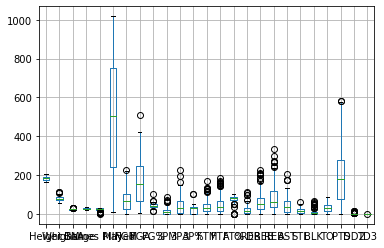

In [65]:
wnba.boxplot()

In [ ]:
#It looks like there is outliers in the MIN, FGA, 3PM and PST columns

**Comment on your result. What do you see?**

In [20]:
#your answer here

**Now we can save the cleaned data to a new .csv file called `wnba_clean.csv` in the data folder.**

In [64]:
wnba.to_csv('wnba_clean.csv')